This is a Python Jupyter notebook that carries out the analysis of line profiles drawn across nuclei to calculate nucleoplasm:nuclear envelope intensity ratios.

To run the entire notebook, click on "Runtime", then choose "Run All". Alternatively, you can click each individual code segment to run it one at a time.

First set up the environment and load needed packages.

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import os

Now we need to upload the CSV files to be anlyzed into the Colab environment.

In [ ]:
from google.colab import files 
  
uploaded = files.upload()


Next we define custom function for finding peaks and calculating NE/nucleoplasm ratio. A peak finder tool is used to find the X positions that correspond to the nuclear envelope in the plot profiles. The intensities of these two peaks are averaged to get a single "NE" intensity value. Then we get the nucleoplasmic intensity value by averaging the intensity vales for the middle 50% of the plot profile between the two peaks.

After this function runs, you will see a plot showing the original data, with "X's" on the two peaks identified as the NE peaks. This method has worked well for us so far, but you may get into issues where it is hard to correctly identify the two NE peaks if the data is very noisy or if the nucleoplasmic signal is equal to or greater than the NE signal. You can visually confirm that the correct peaks were called, and if you see that it isn't working on your data we can brainstorm other options.

In [11]:
def NucRatio(filename): 
    #read in csv from plot profiles, find peaks from NE and Nucleoplasm in middle,
    #extract peak intensity values and calculate Nuc/NE ratio. Save output to dataframe
    npc = pd.read_csv(filename)
    name = filename
    X = np.array(npc.X)
    Y = np.array(npc.Y)
    bg = min(Y).astype(int)
    Y = Y-bg
    peaks, _ = find_peaks(Y, distance=2, prominence=75)
    print('Number of Peaks:', len(peaks))
    print(peaks)
    if len(peaks) != 2:
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.grid(which='both', axis='both', linestyle='--')
      plt.title(name)
      plt.show()
      ne1=int(input("Choose NE1 Peak X position"))
      ne2=int(input("Choose NE2 Peak X position"))
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = int(ne1+(0.25*peakRange))
      nucEnd = int(ne2-(0.25*peakRange))
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd])
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.title(name)
      plt.grid(which='both', axis='both', linestyle='--')
      plt.show()
      return(output)
    else:
      ne1 = min(peaks)
      ne2 = max(peaks)
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = ne1+(0.25*peakRange).astype(int)
      nucEnd = ne2-(0.25*peakRange).astype(int)
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd]).astype(int)
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.title(name)
      plt.grid(which='both', axis='both', linestyle='--')
      plt.show()
      return(output)

Next, we can apply this function to one csv to see how it works.



You have uploaded 102 files.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'Y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':


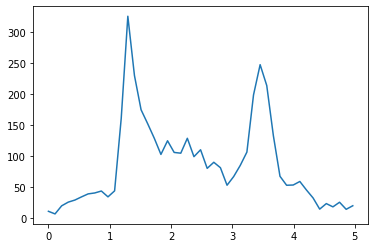

In [4]:
data = list(uploaded)

print("You have uploaded", len(data), "files.")

check=pd.read_csv(data[0])
check.head()
type(check)

plt.plot("X", "Y", data=check)






Now we can apply this to all CSV files uploaded to the directory in batch.


Number of Peaks: 2
[12 32]
NEs: [12 32]
Peak Dist.: 20
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  92.669
NucInt padded:  96


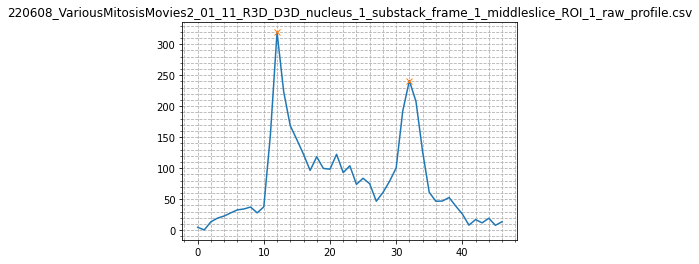

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  57.888999999999996
NucInt padded:  45


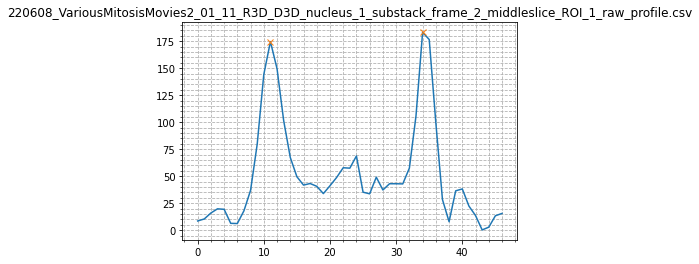

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  17.276
NucInt padded:  51


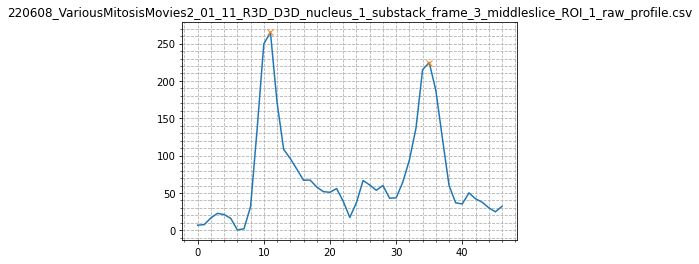

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  61.592
NucInt padded:  91


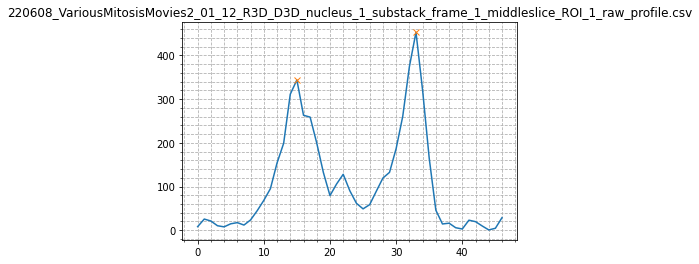

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  137.234
NucInt padded:  121


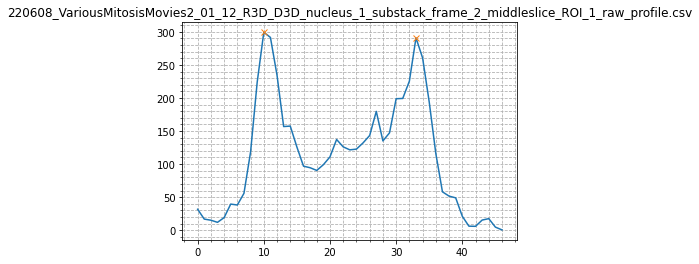

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  99.073
NucInt padded:  96


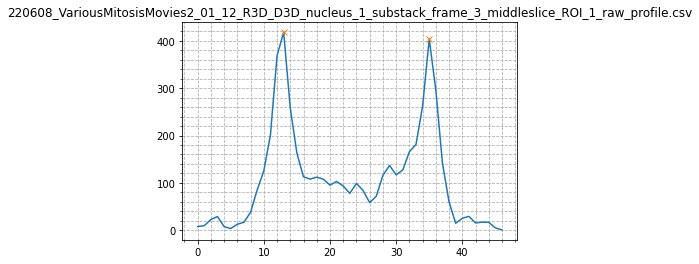

Number of Peaks: 3
[12 24 32]


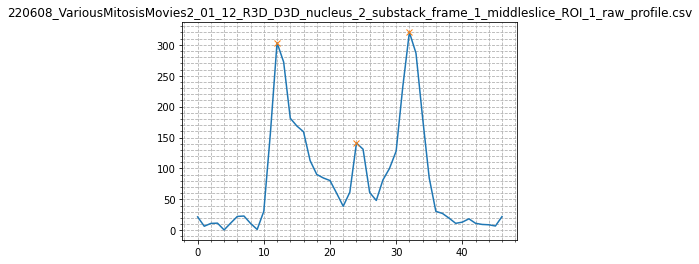

Choose NE1 Peak X position12
Choose NE2 Peak X position32
NEs: [12 32]
Peak Dist.: 20
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  38.844
NucInt padded:  86.1708


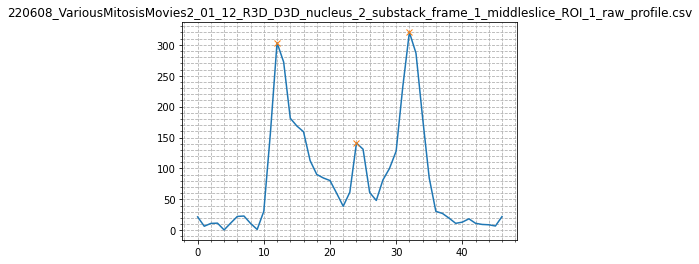

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  70.123
NucInt padded:  86


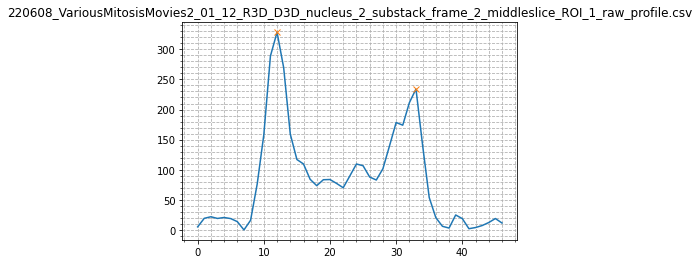

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  106.808
NucInt padded:  100


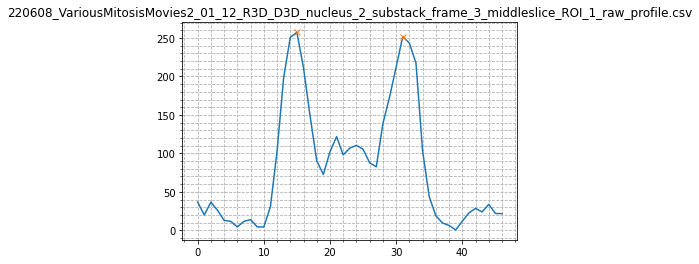

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  75.758
NucInt padded:  77


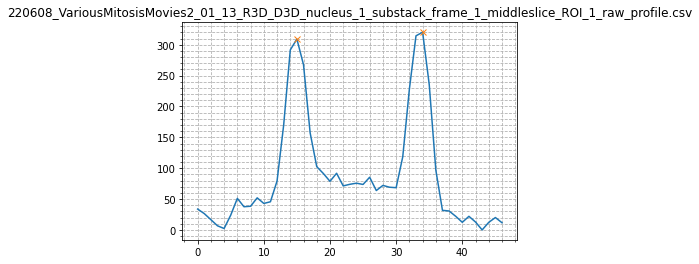

Number of Peaks: 2
[11 30]
NEs: [11 30]
Peak Dist.: 19
Nuc Mid:  20
NucStart:  15 NucEnd:  26
NucInt Point:  170.756
NucInt padded:  151


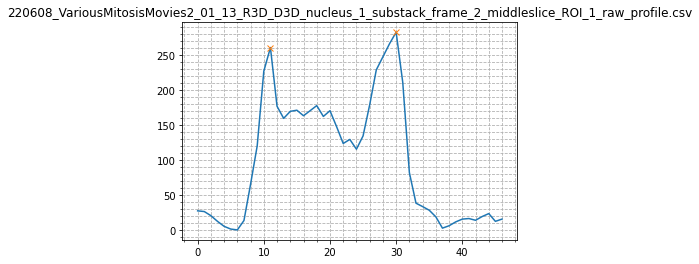

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  92.32
NucInt padded:  95


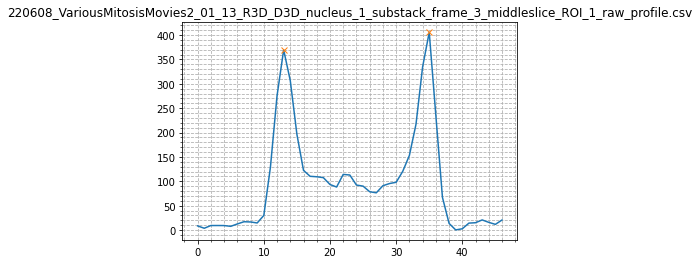

Number of Peaks: 2
[12 31]
NEs: [12 31]
Peak Dist.: 19
Nuc Mid:  21
NucStart:  16 NucEnd:  27
NucInt Point:  70.69
NucInt padded:  114


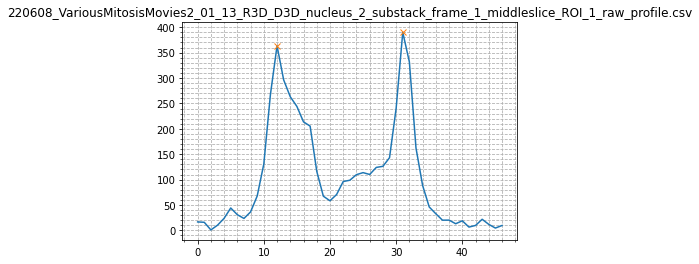

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  126.404
NucInt padded:  119


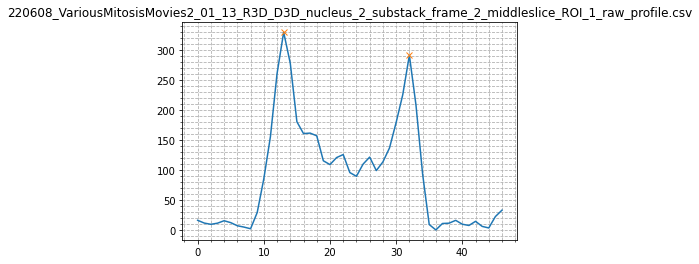

Number of Peaks: 2
[14 34]
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  139.704
NucInt padded:  107


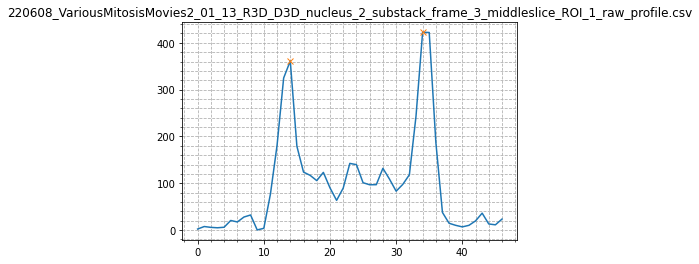

Number of Peaks: 2
[16 29]
NEs: [16 29]
Peak Dist.: 13
Nuc Mid:  22
NucStart:  19 NucEnd:  26
NucInt Point:  120.331
NucInt padded:  95


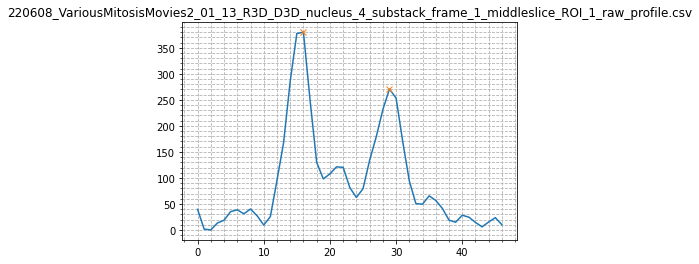

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  113.365
NucInt padded:  131


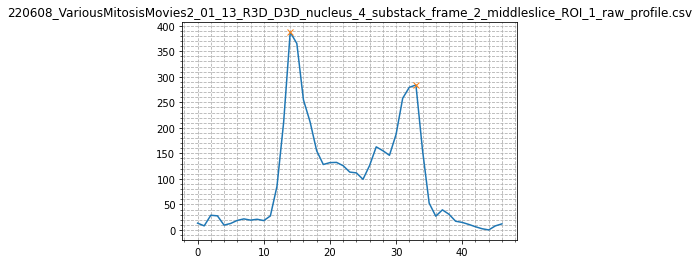

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  114.489
NucInt padded:  134


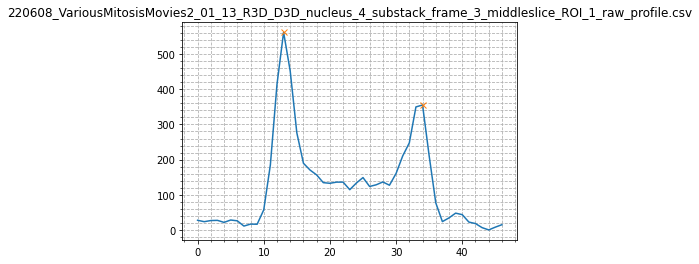

Number of Peaks: 2
[12 31]
NEs: [12 31]
Peak Dist.: 19
Nuc Mid:  21
NucStart:  16 NucEnd:  27
NucInt Point:  94.345
NucInt padded:  107


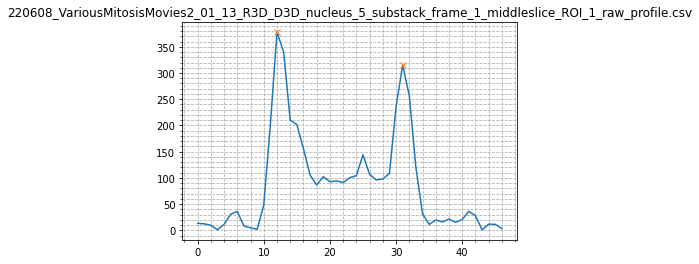

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  88.15
NucInt padded:  107


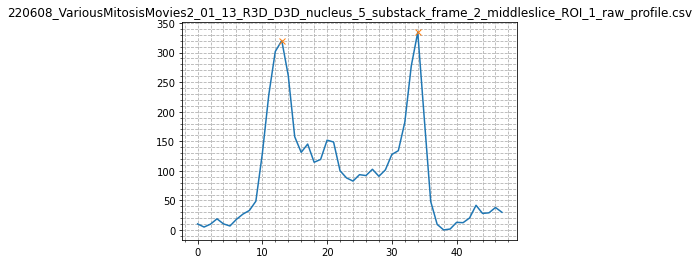

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  106.89
NucInt padded:  108


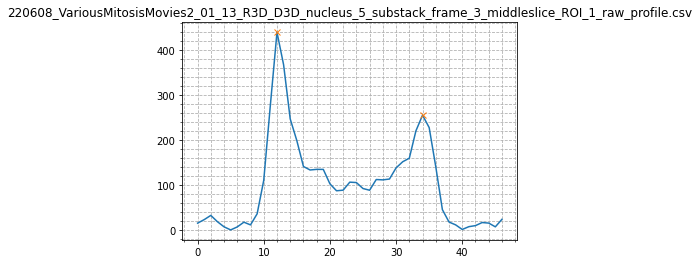

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  68.108
NucInt padded:  97


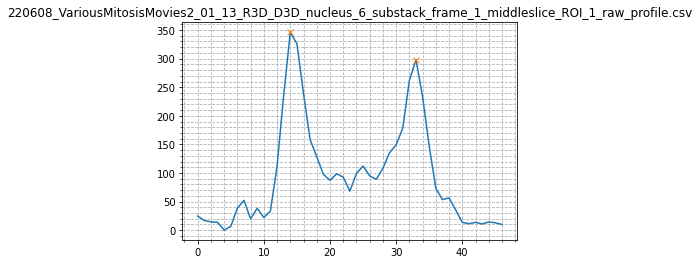

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  93.13
NucInt padded:  104


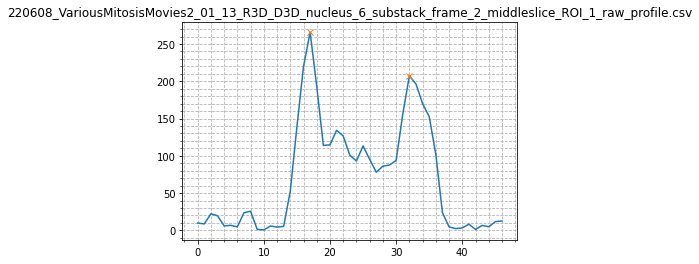

Number of Peaks: 2
[16 34]
NEs: [16 34]
Peak Dist.: 18
Nuc Mid:  25
NucStart:  20 NucEnd:  30
NucInt Point:  125.547
NucInt padded:  109


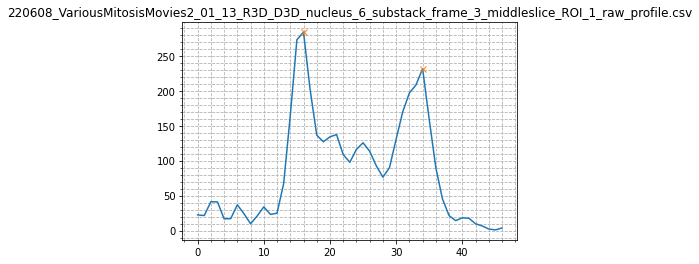

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  87.731
NucInt padded:  92


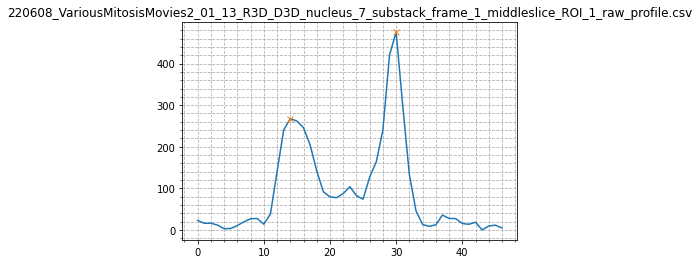

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  127.131
NucInt padded:  141


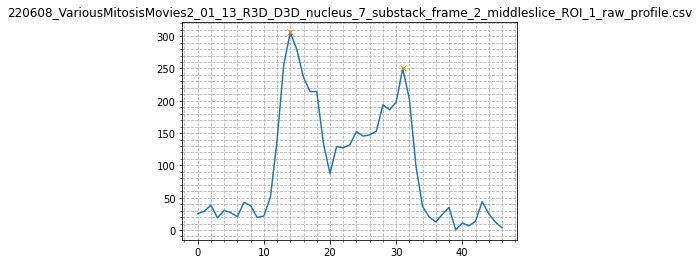

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  138.195
NucInt padded:  137


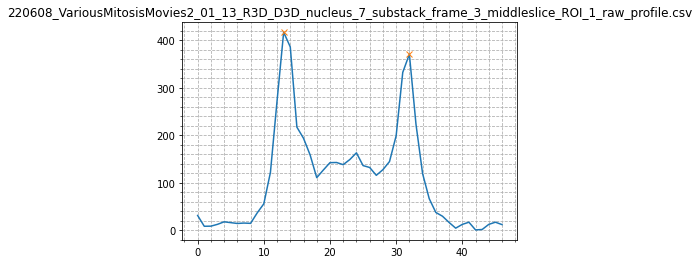

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  108.867
NucInt padded:  109


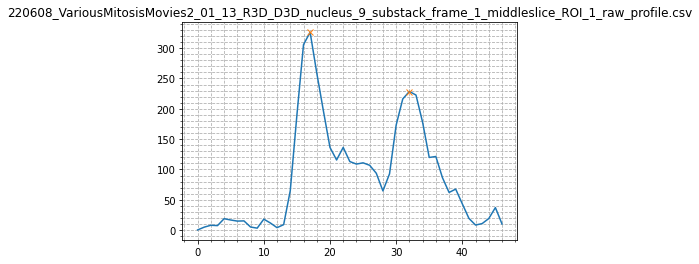

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  97.569
NucInt padded:  109


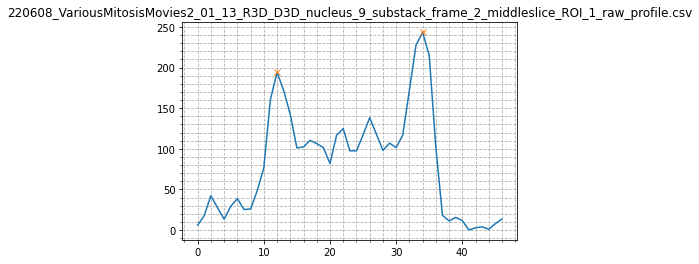

Number of Peaks: 2
[12 31]
NEs: [12 31]
Peak Dist.: 19
Nuc Mid:  21
NucStart:  16 NucEnd:  27
NucInt Point:  96.447
NucInt padded:  90


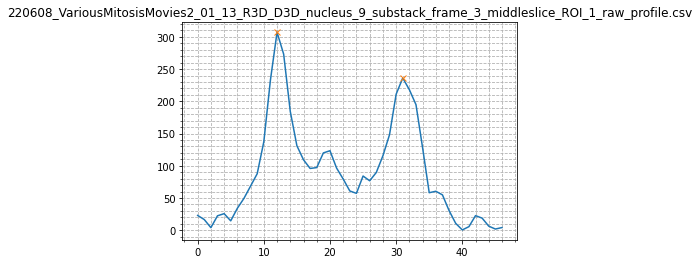

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  121.962
NucInt padded:  116


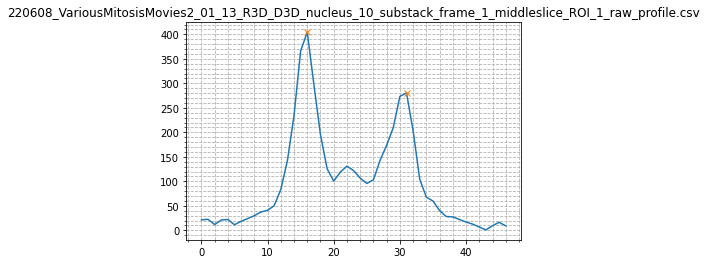

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  92.407
NucInt padded:  88


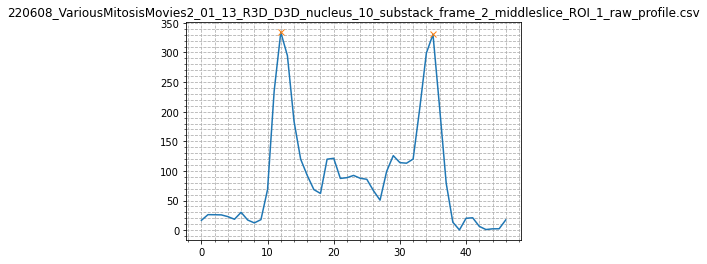

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  83.899
NucInt padded:  116


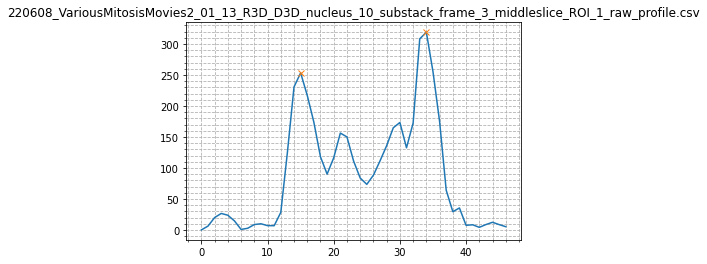

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  108.267
NucInt padded:  127


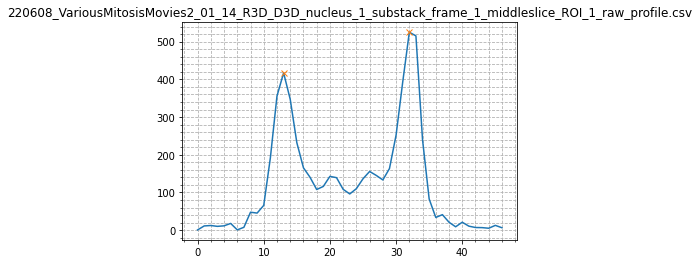

Number of Peaks: 2
[11 36]
NEs: [11 36]
Peak Dist.: 25
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  79.403
NucInt padded:  83


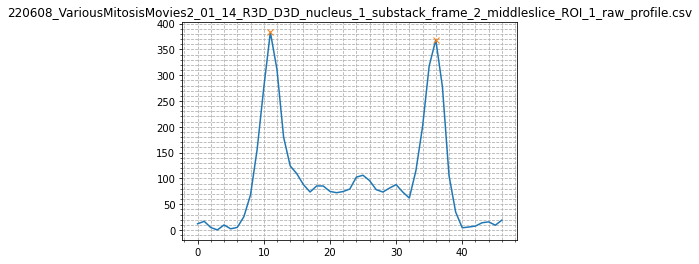

Number of Peaks: 2
[14 35]
NEs: [14 35]
Peak Dist.: 21
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  150.219
NucInt padded:  111


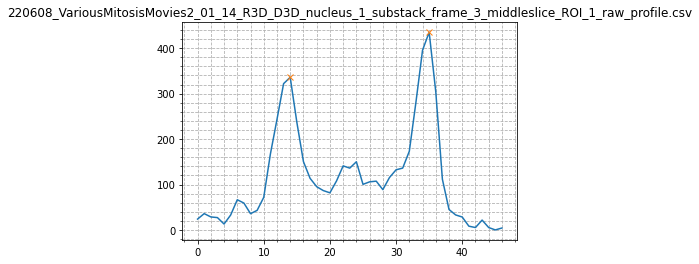

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  67.837
NucInt padded:  87


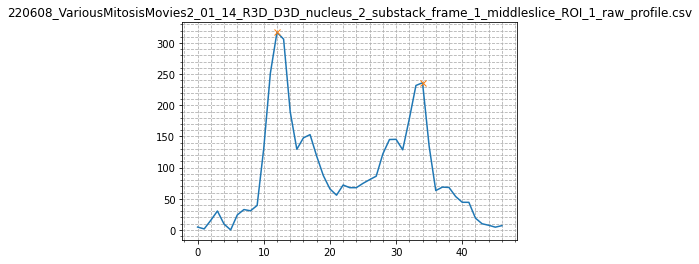

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  79.144
NucInt padded:  106


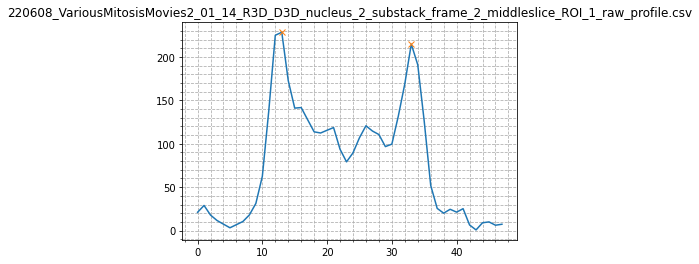

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  96.224
NucInt padded:  105


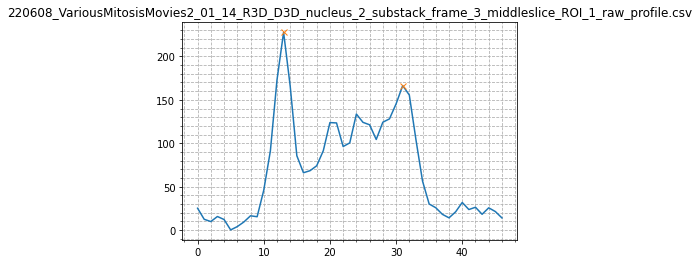

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  77.406
NucInt padded:  96


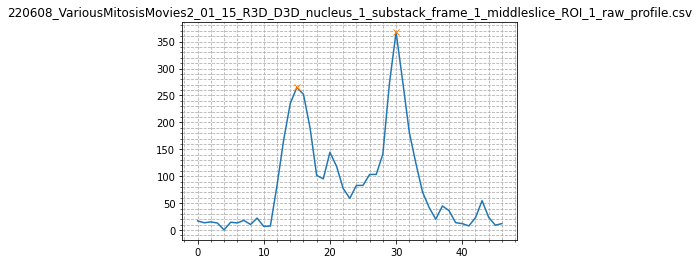

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  143.44
NucInt padded:  127


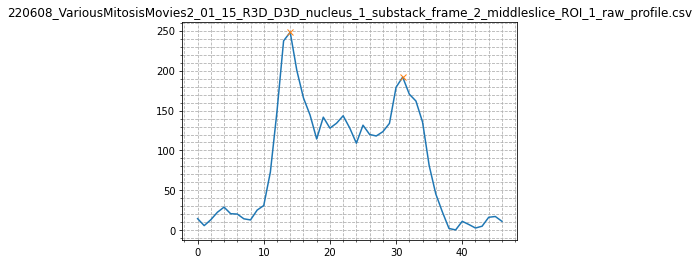

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  87.39
NucInt padded:  81


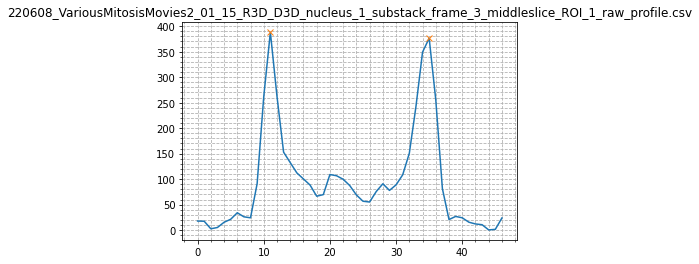

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  62.289
NucInt padded:  100


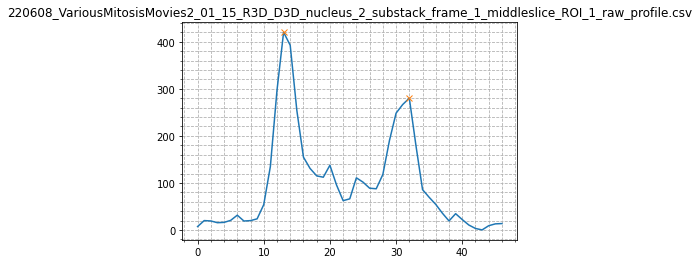

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  153.342
NucInt padded:  142


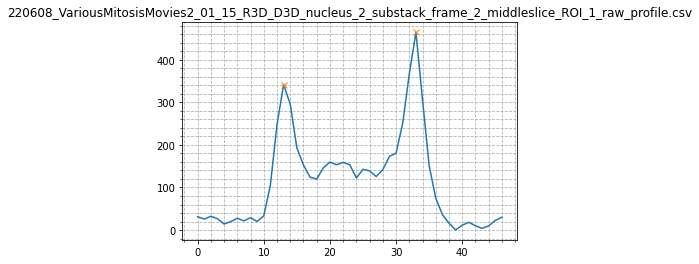

Number of Peaks: 2
[13 30]
NEs: [13 30]
Peak Dist.: 17
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  107.626
NucInt padded:  100


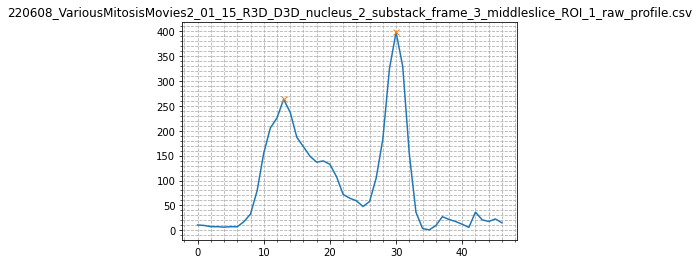

Number of Peaks: 2
[14 29]
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  113.551
NucInt padded:  133


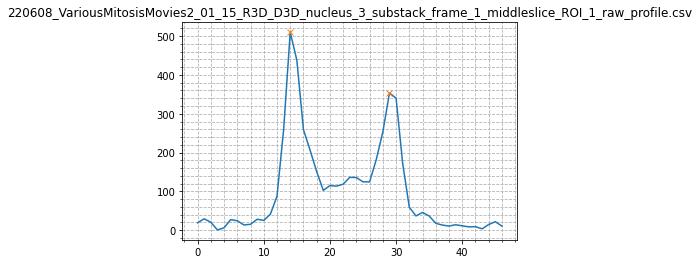

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  115.079
NucInt padded:  110


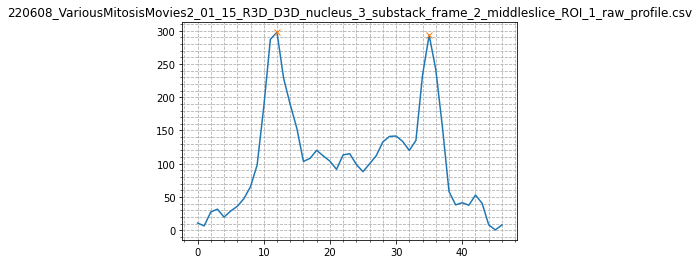

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  78.151
NucInt padded:  101


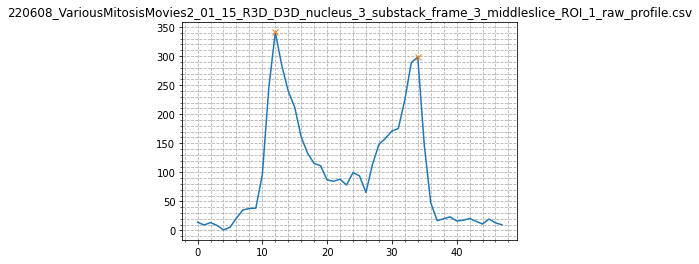

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  118.076
NucInt padded:  106


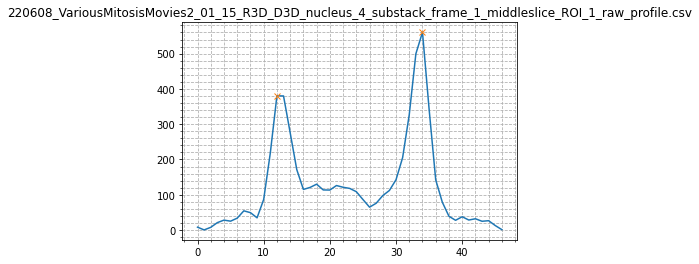

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  67.111
NucInt padded:  104


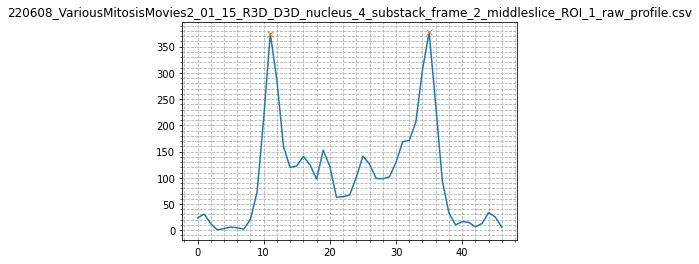

Number of Peaks: 2
[13 37]
NEs: [13 37]
Peak Dist.: 24
Nuc Mid:  25
NucStart:  19 NucEnd:  31
NucInt Point:  79.282
NucInt padded:  96


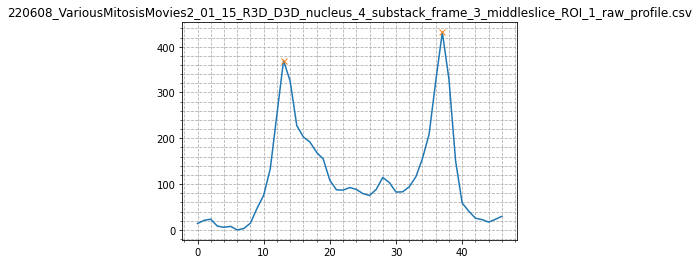

Number of Peaks: 2
[12 38]
NEs: [12 38]
Peak Dist.: 26
Nuc Mid:  25
NucStart:  18 NucEnd:  32
NucInt Point:  115.65
NucInt padded:  86


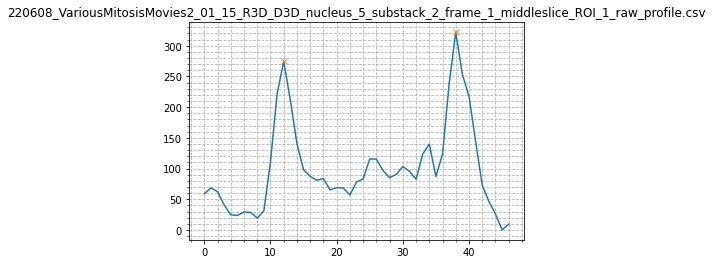

Number of Peaks: 2
[16 33]
NEs: [16 33]
Peak Dist.: 17
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  116.543
NucInt padded:  127


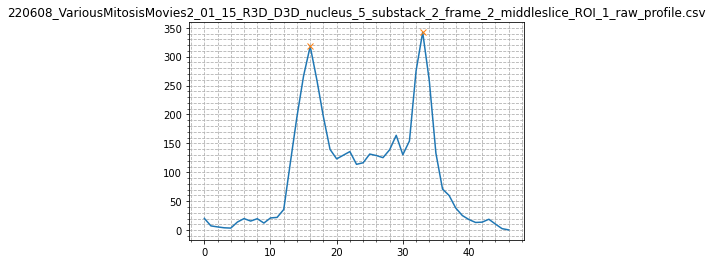

Number of Peaks: 2
[14 35]
NEs: [14 35]
Peak Dist.: 21
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  125.61699999999999
NucInt padded:  97


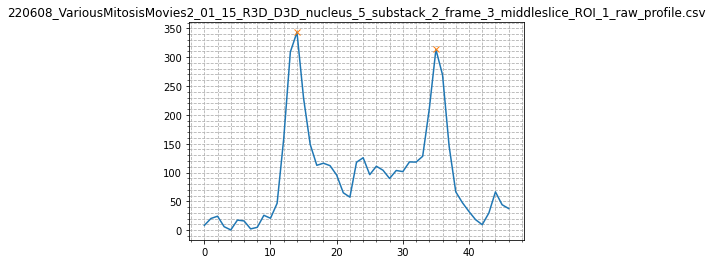

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  72.776
NucInt padded:  117


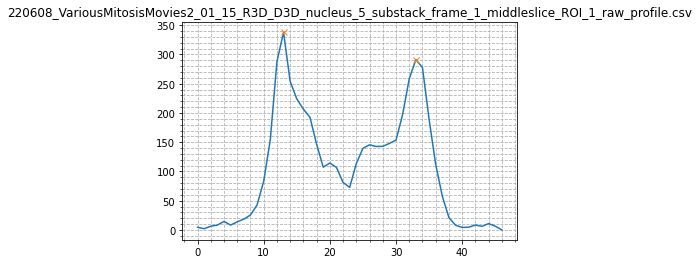

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  54.613
NucInt padded:  66


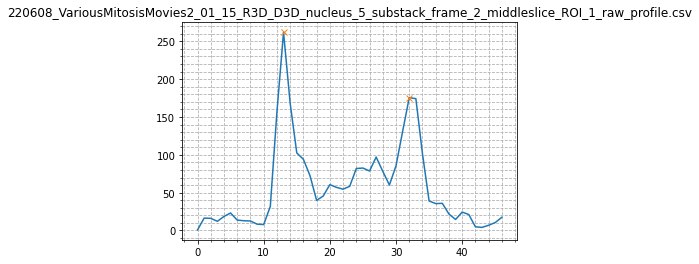

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  84.329
NucInt padded:  78


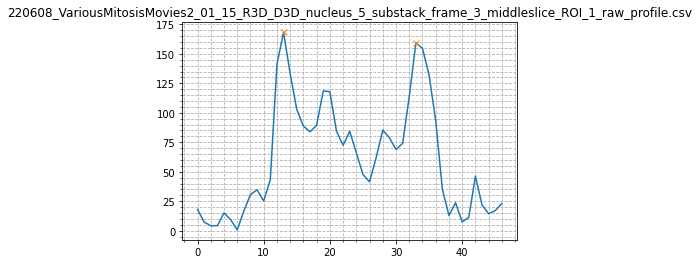

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  97.464
NucInt padded:  97


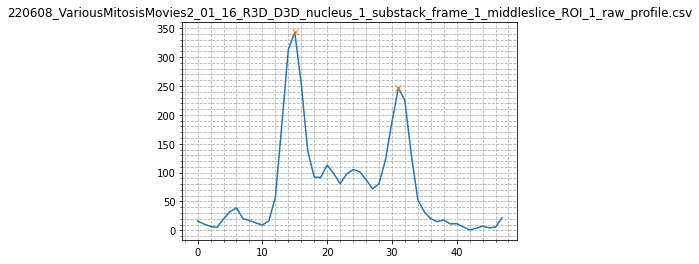

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  114.875
NucInt padded:  122


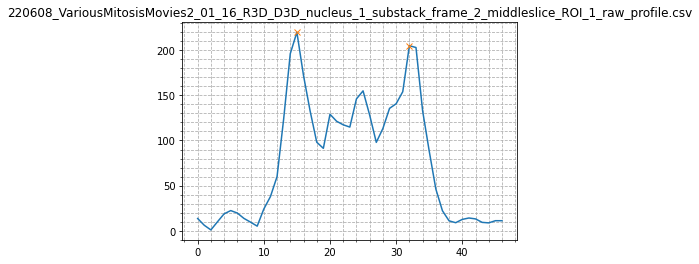

Number of Peaks: 2
[11 31]
NEs: [11 31]
Peak Dist.: 20
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  63.774
NucInt padded:  71


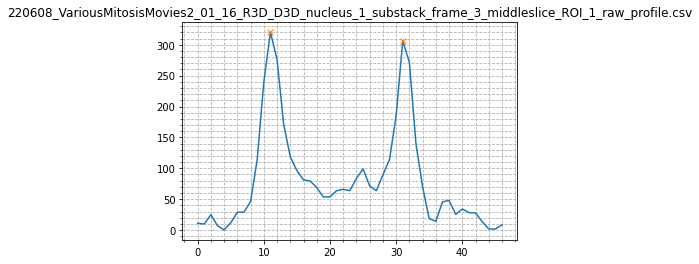

Number of Peaks: 2
[11 37]
NEs: [11 37]
Peak Dist.: 26
Nuc Mid:  24
NucStart:  17 NucEnd:  31
NucInt Point:  86.984
NucInt padded:  91


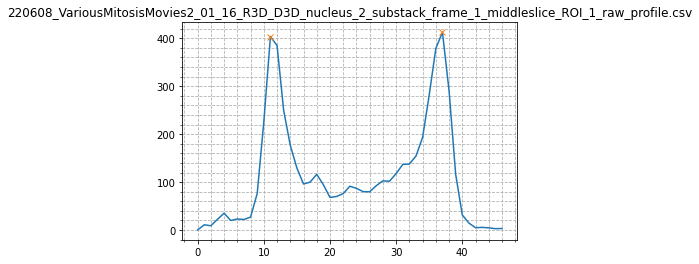

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  157.669
NucInt padded:  134


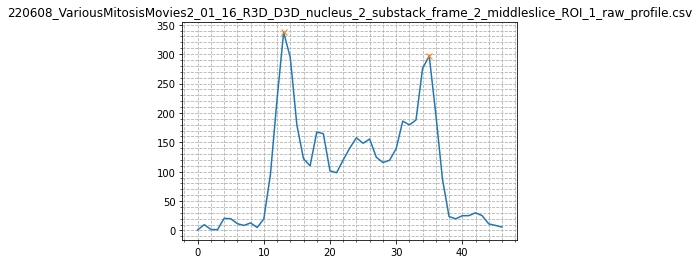

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  83.503
NucInt padded:  107


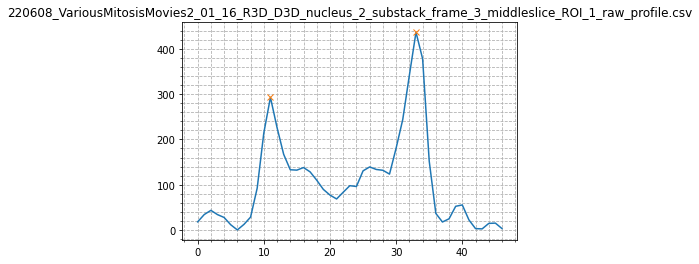

Number of Peaks: 2
[11 36]
NEs: [11 36]
Peak Dist.: 25
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  91.745
NucInt padded:  76


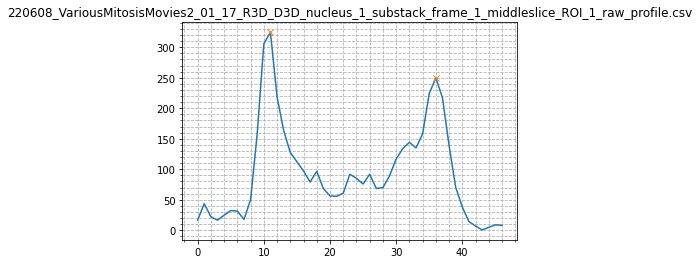

Number of Peaks: 2
[14 34]
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  106.673
NucInt padded:  109


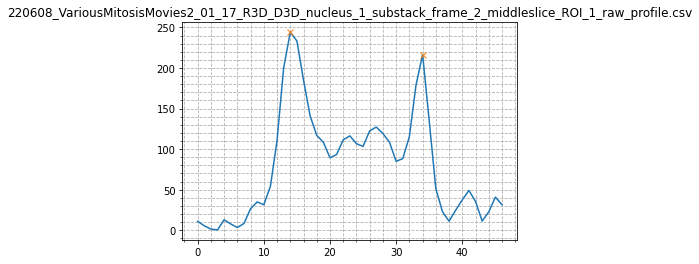

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  89.646
NucInt padded:  87


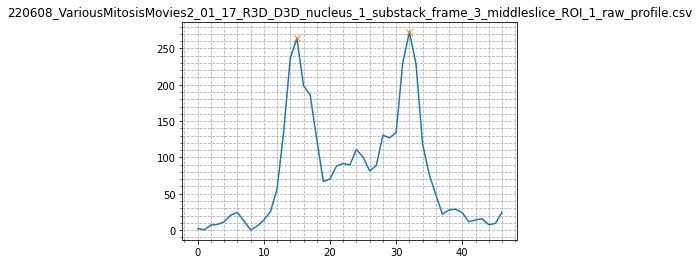

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  99.088
NucInt padded:  99


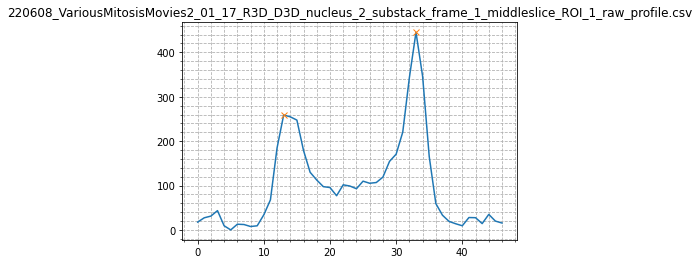

Number of Peaks: 2
[10 32]
NEs: [10 32]
Peak Dist.: 22
Nuc Mid:  21
NucStart:  15 NucEnd:  27
NucInt Point:  105.355
NucInt padded:  122


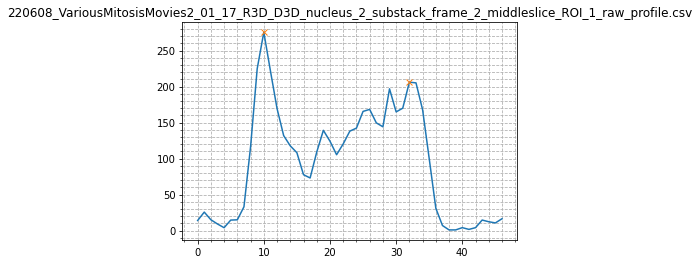

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  95.288
NucInt padded:  104


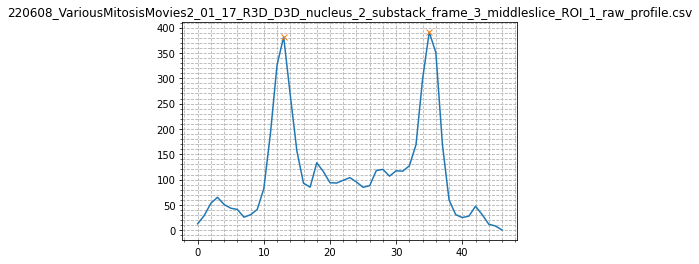

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  137.121
NucInt padded:  142


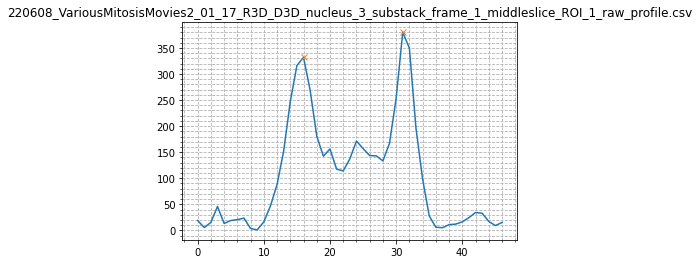

Number of Peaks: 2
[12 30]
NEs: [12 30]
Peak Dist.: 18
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  130.232
NucInt padded:  129


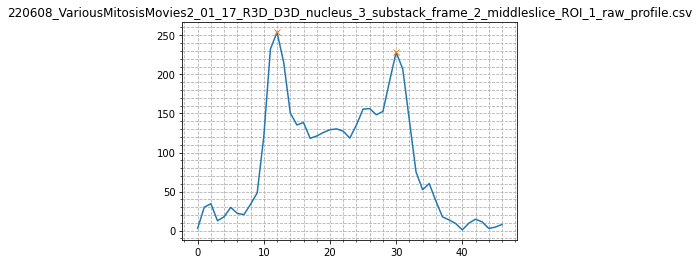

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  103.798
NucInt padded:  119


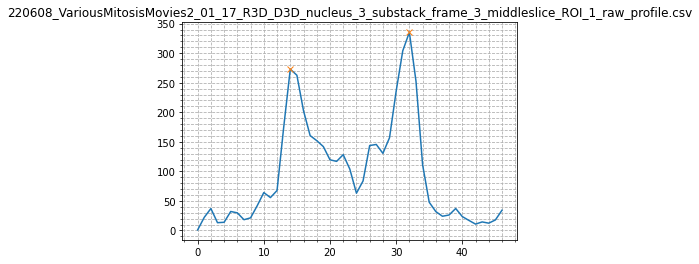

Number of Peaks: 2
[10 35]
NEs: [10 35]
Peak Dist.: 25
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  47.217
NucInt padded:  60


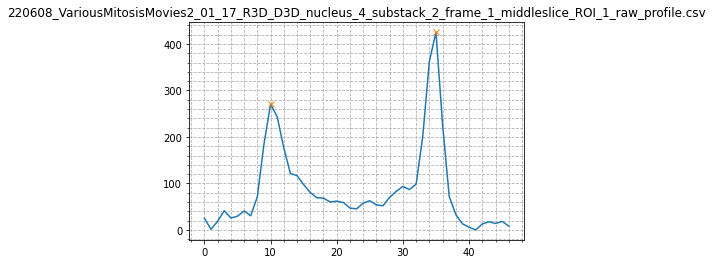

Number of Peaks: 2
[12 30]
NEs: [12 30]
Peak Dist.: 18
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  118.383
NucInt padded:  109


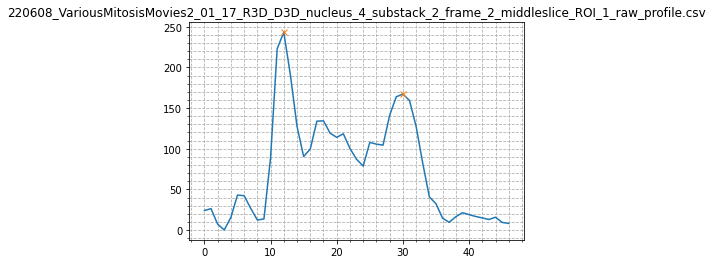

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  76.246
NucInt padded:  65


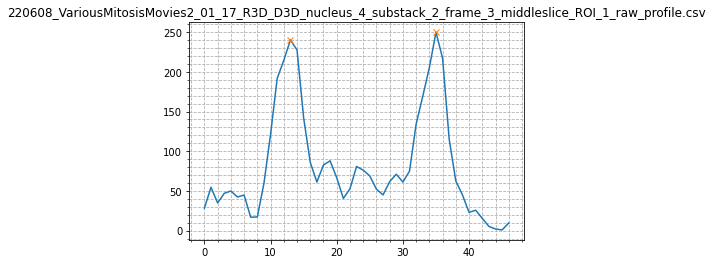

Number of Peaks: 2
[ 9 35]
NEs: [ 9 35]
Peak Dist.: 26
Nuc Mid:  22
NucStart:  15 NucEnd:  29
NucInt Point:  60.946
NucInt padded:  76


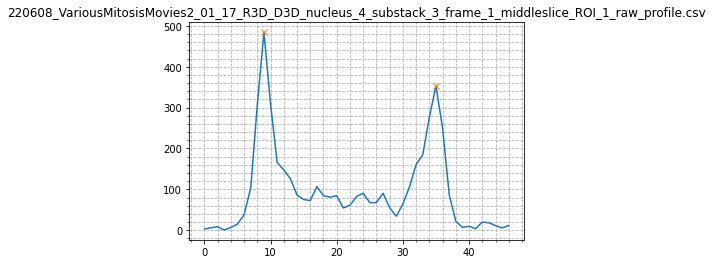

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  55.915000000000006
NucInt padded:  70


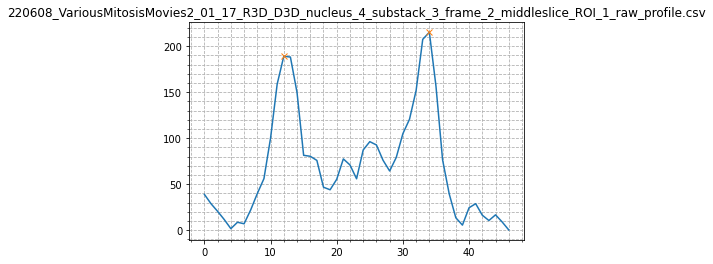

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  65.312
NucInt padded:  84


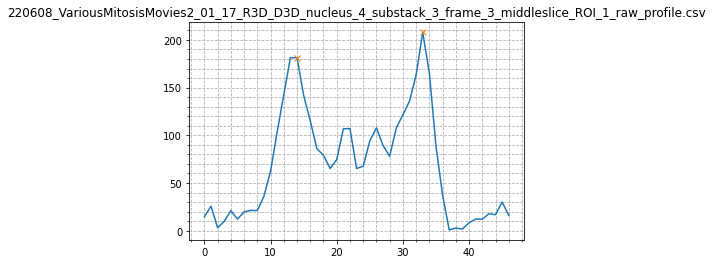

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  82.205
NucInt padded:  69


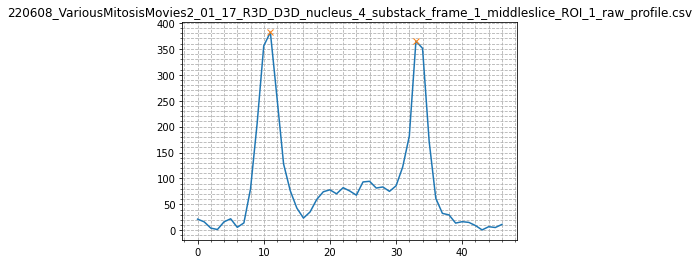

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  18.017
NucInt padded:  56


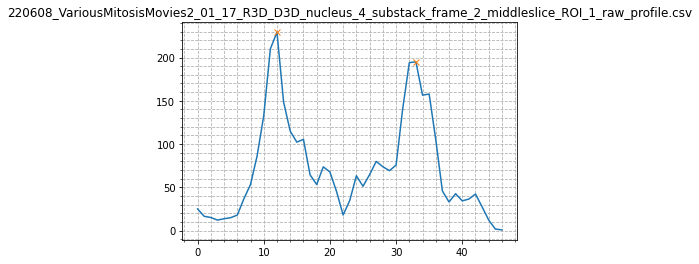

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  71.952
NucInt padded:  80


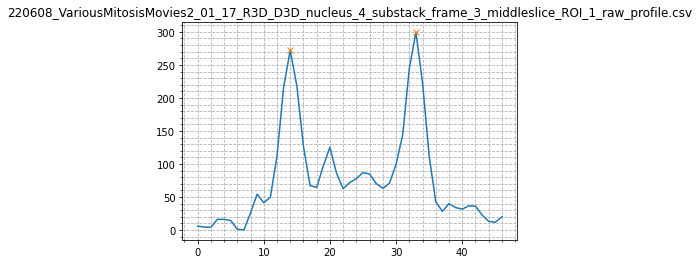

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  96.928
NucInt padded:  91


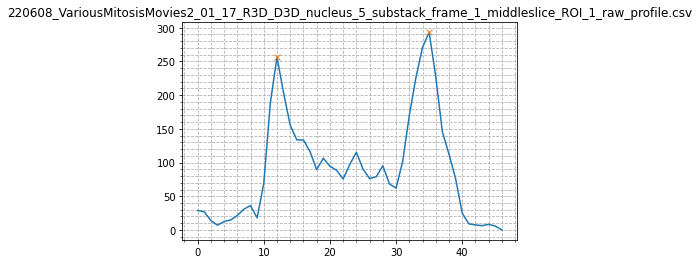

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  108.426
NucInt padded:  101


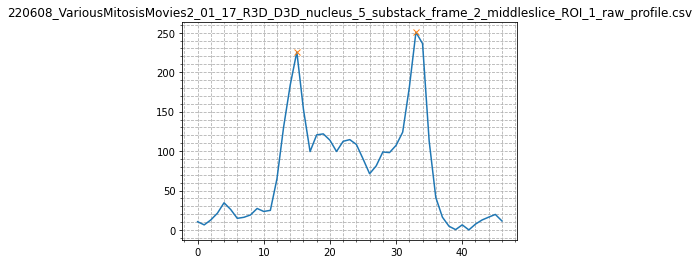

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  121.394
NucInt padded:  96


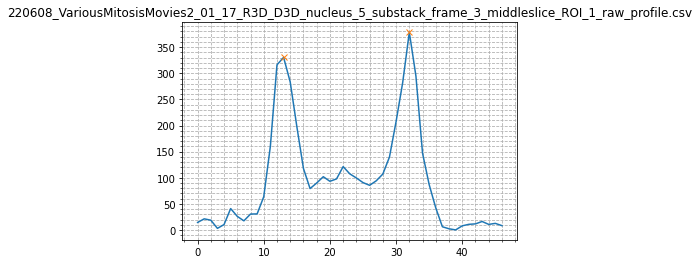

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  56.235
NucInt padded:  90


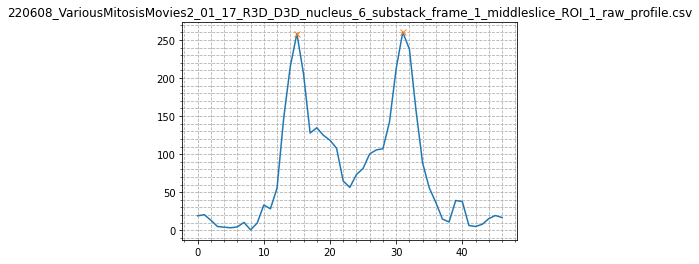

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  114.951
NucInt padded:  108


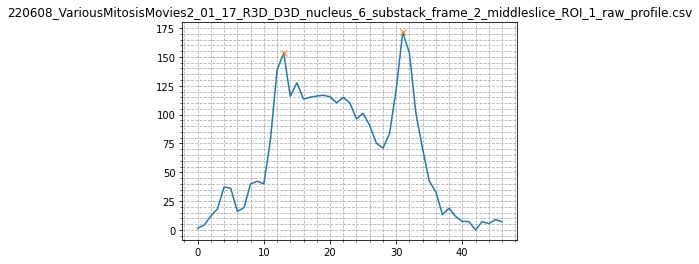

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  67.586
NucInt padded:  76


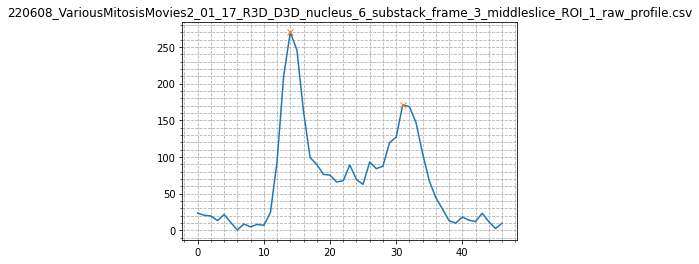

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  42.317
NucInt padded:  83


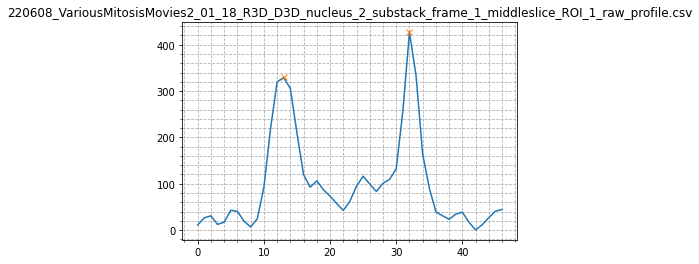

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  111.002
NucInt padded:  129


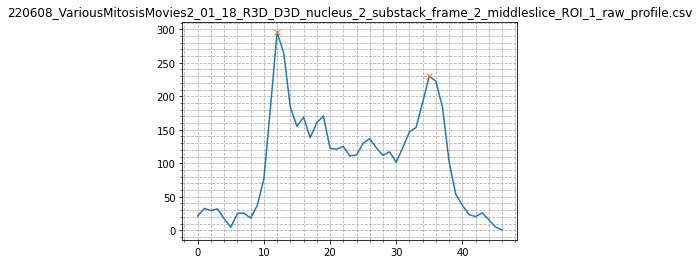

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  81.185
NucInt padded:  85


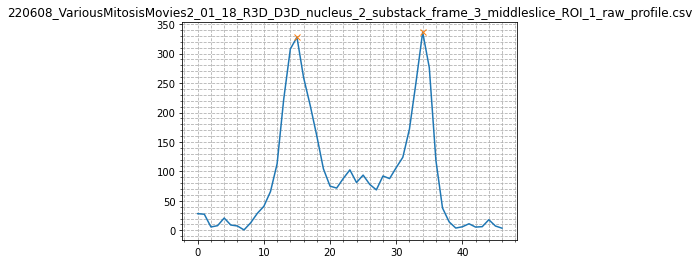

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  119.46
NucInt padded:  139


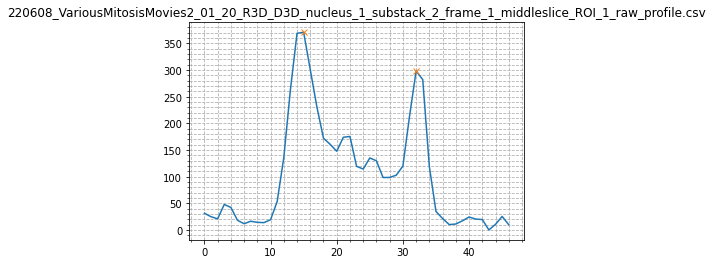

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  112.168
NucInt padded:  119


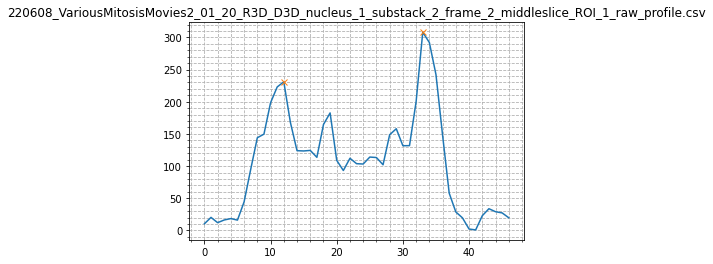

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  53.334
NucInt padded:  81


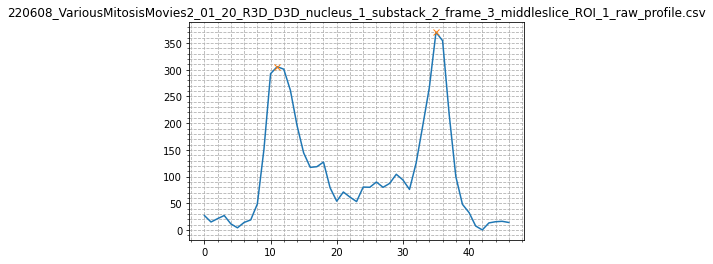

Number of Peaks: 2
[14 36]
NEs: [14 36]
Peak Dist.: 22
Nuc Mid:  25
NucStart:  19 NucEnd:  31
NucInt Point:  60.355999999999995
NucInt padded:  73


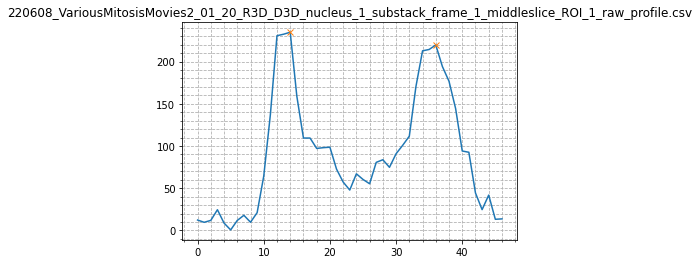

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  92.649
NucInt padded:  96


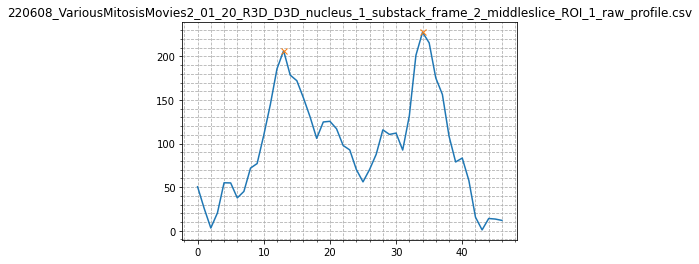

Number of Peaks: 2
[15 35]
NEs: [15 35]
Peak Dist.: 20
Nuc Mid:  25
NucStart:  20 NucEnd:  30
NucInt Point:  59.173
NucInt padded:  74


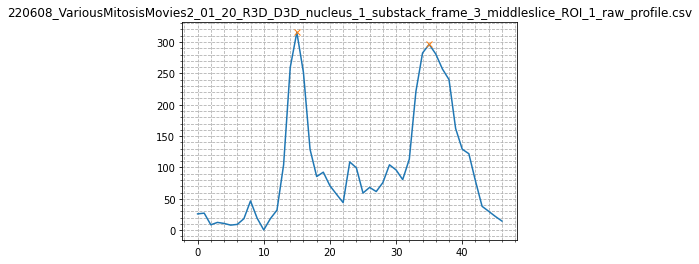

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  88.048
NucInt padded:  90


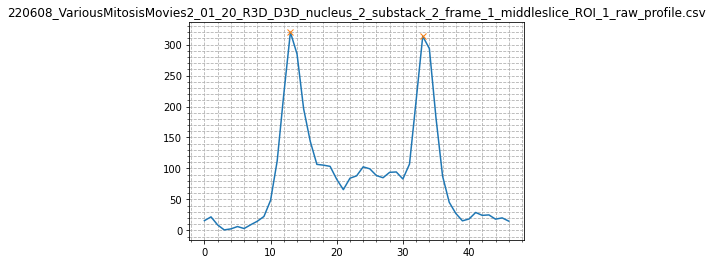

Number of Peaks: 1
[30]


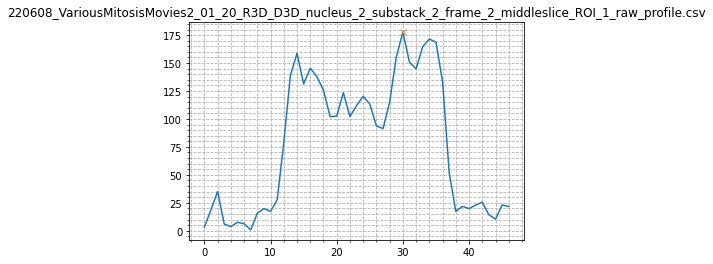

Choose NE1 Peak X position14
Choose NE2 Peak X position34
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  120.28299999999999
NucInt padded:  107.5906


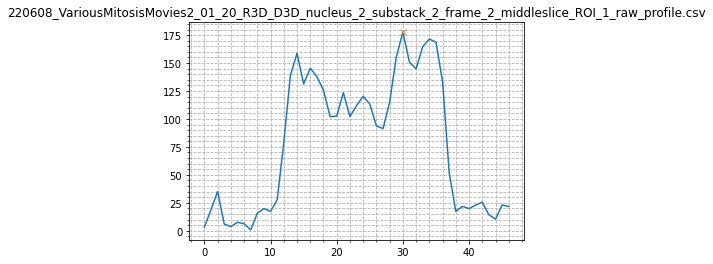

Number of Peaks: 2
[14 36]
NEs: [14 36]
Peak Dist.: 22
Nuc Mid:  25
NucStart:  19 NucEnd:  31
NucInt Point:  57.346
NucInt padded:  83


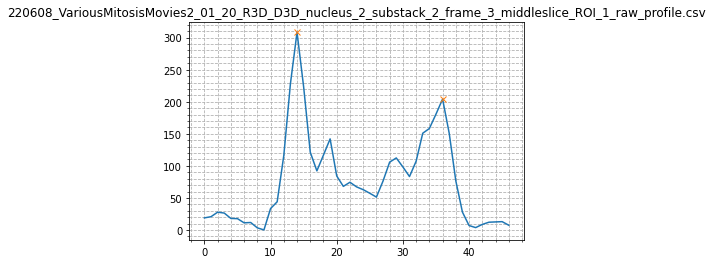

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  88.77
NucInt padded:  98


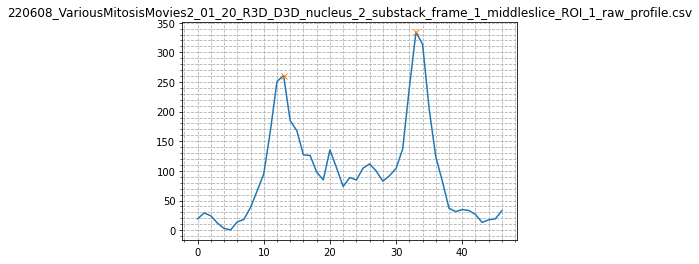

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  102.919
NucInt padded:  86


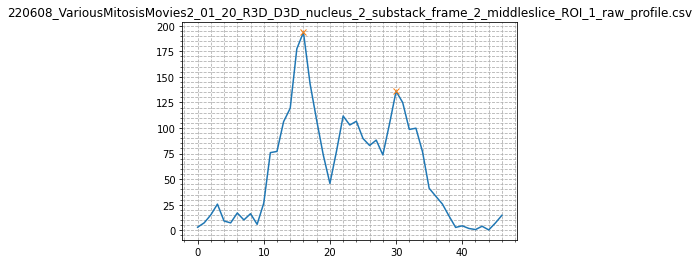

Number of Peaks: 2
[11 36]
NEs: [11 36]
Peak Dist.: 25
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  81.912
NucInt padded:  83


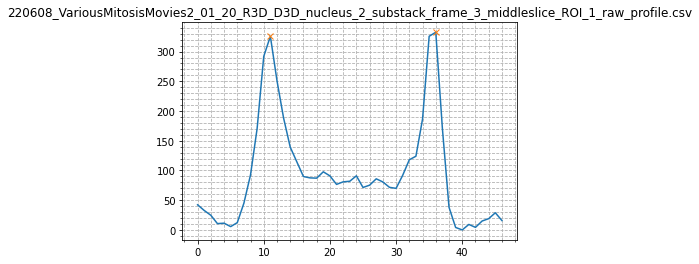

In [12]:
name_list=[]
ne1_list=[]
ne2_list=[]
nuc_list=[]
ratio_list=[]

for f in data:
    name,ne1int,ne2int,nuc,nucRatio = NucRatio(f)
    name_list.append(name)
    ne1_list.append(ne1int)
    ne2_list.append(ne2int)
    nuc_list.append(nuc)
    ratio_list.append(nucRatio)

df = pd.DataFrame({'Image': name_list, 'NE1_int': ne1_list,'NE2_int': ne2_list,'Nuc_int': nuc_list, 'Nuc_Ratio': ratio_list })
df = df[["Image", "NE1_int", "NE2_int", "Nuc_int", "Nuc_Ratio"]]
df.to_csv('NucRatios.csv')

If you are running this notebook in a Google Chrome browser, then the following code will automatically download the output as a CSV to your local computer. This only works within Chrome, so if you aren't using Chrome, you can manually download the output file by clicking the folder icon on the left side of the window. This will open the "Files" browser, and you should see all of the CSV files you uploaded, as well as the "NucRatios.csv" output file. Right click on the ouput file to bring up the options and download to your local computer.

In [13]:
files.download('NucRatios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To see a plot of the ratio values calculated we can plot a histogram of the results.

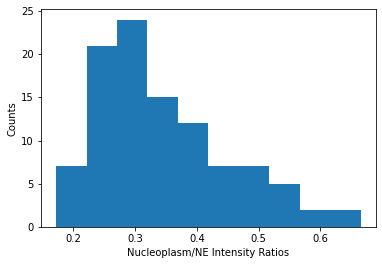

In [14]:
%matplotlib inline

ratios = df.Nuc_Ratio

plt.hist(ratios, density=False, bins=10)
plt.ylabel("Counts") 
plt.xlabel('Nucleoplasm/NE Intensity Ratios');

If you want to reuse this notebook for another data set, strain, experiment etc. then you can click on "Runtime" at the top of the page and click "Factory Reset Runtime". This will keep the Python code notebook but will remove all of the uploaded files and the generated output file. You can then repeat the analysis, this time uploading the new set of CSVs for the next analysis.
